In [28]:
import pandas as pd
import numpy as np

from datetime import datetime as dt
from datetime import timedelta
import re
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [29]:
customer = pd.read_csv (r'C:\Users\sahra\OneDrive\Queens University\Courses\MMA831 - Marketing Analytics\Final Project\olist_customers_dataset.csv')
location = pd.read_csv (r'C:\Users\sahra\OneDrive\Queens University\Courses\MMA831 - Marketing Analytics\Final Project\olist_geolocation_dataset.csv')
order_items = pd.read_csv (r'C:\Users\sahra\OneDrive\Queens University\Courses\MMA831 - Marketing Analytics\Final Project\olist_order_items_dataset.csv')
order_payments = pd.read_csv (r'C:\Users\sahra\OneDrive\Queens University\Courses\MMA831 - Marketing Analytics\Final Project\olist_order_payments_dataset.csv')
order_reviews = pd.read_csv (r'C:\Users\sahra\OneDrive\Queens University\Courses\MMA831 - Marketing Analytics\Final Project\olist_order_reviews_dataset.csv')
orders = pd.read_csv (r'C:\Users\sahra\OneDrive\Queens University\Courses\MMA831 - Marketing Analytics\Final Project\olist_orders_dataset.csv')
products = pd.read_csv (r'C:\Users\sahra\OneDrive\Queens University\Courses\MMA831 - Marketing Analytics\Final Project\olist_products_dataset.csv')
sellers = pd.read_csv (r'C:\Users\sahra\OneDrive\Queens University\Courses\MMA831 - Marketing Analytics\Final Project\olist_sellers_dataset.csv')
name_translation = pd.read_csv (r'C:\Users\sahra\OneDrive\Queens University\Courses\MMA831 - Marketing Analytics\Final Project\product_category_name_translation.csv')


In [30]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [31]:
#Checking for NA's in the customer data - there do not appear to be any NA's
customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [32]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [33]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [34]:
#Checking for NA's in orders - we can see some variables with NA's
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [38]:
#Checking for NA's in payments - there are none
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [39]:
#Checking for NA's in order_items - there are none
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [40]:
#Checking for NA's in seller - there are none
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [41]:
#Checking for NAs in products - we can find some NA variables here
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [42]:
#For the purpose of this analysis we are merging orders, order_items, order_payments and customers
consolidated_data = pd.merge(customer, orders, on='customer_id')
consolidated_data = consolidated_data.merge(order_items, on='order_id')
consolidated_data = consolidated_data.merge(order_payments, on='order_id')

consolidated_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1,credit_card,8,252.25


In [43]:
print(consolidated_data.shape)

(117601, 22)


In [46]:
# converting date columns to datetime
date_columns = ['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    consolidated_data[col] = pd.to_datetime(consolidated_data[col], format='%Y-%m-%d %H:%M:%S')

In [49]:
# Feature engineering 
consolidated_data['delivery_against_estimated'] = (consolidated_data['order_estimated_delivery_date'] - consolidated_data['order_delivered_customer_date']).dt.days
consolidated_data['order_purchase_year'] = consolidated_data.order_purchase_timestamp.apply(lambda x: x.year)
consolidated_data['order_purchase_month'] = consolidated_data.order_purchase_timestamp.apply(lambda x: x.month)
consolidated_data['order_purchase_dayofweek'] = consolidated_data.order_purchase_timestamp.apply(lambda x: x.dayofweek)
consolidated_data['order_purchase_hour'] = consolidated_data.order_purchase_timestamp.apply(lambda x: x.hour)
consolidated_data['order_purchase_day'] = consolidated_data['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
consolidated_data['order_purchase_month'] = consolidated_data.order_purchase_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

# Changing the month attribute for correct ordenation
consolidated_data['month_year'] = consolidated_data['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)
consolidated_data['month_year'] = consolidated_data['order_purchase_year'].astype(str) + '-' + consolidated_data['month_year'].astype(str)
#creating year month column
consolidated_data['month_y'] = consolidated_data['order_purchase_timestamp'].map(lambda date: 100*date.year + date.month)

In [50]:
consolidated_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,month_year,month_y
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2,146.87,10.0,2017,May,1,15,Tue,2017-May,201705
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,8,335.48,7.0,2018,Jan,4,20,Fri,2018-Jan,201801
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,7,157.73,-2.0,2018,May,5,16,Sat,2018-May,201805
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,173.30,12.0,2018,Mar,1,16,Tue,2018-Mar,201803
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,8,252.25,5.0,2018,Jul,6,9,Sun,2018-Jul,201807


In [52]:
consolidated_data.describe(include='all')

<ipython-input-52-2fdf603c3bc4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  consolidated_data.describe(include='all')
<ipython-input-52-2fdf603c3bc4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  consolidated_data.describe(include='all')
<ipython-input-52-2fdf603c3bc4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  consolidated_data.describe(include='all')
<ipython-input-52-2fdf

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,delivery_against_estimated,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,month_year,month_y
count,117601,117601,117601.000000,117601,117601,117601,117601,117601,117586,116356,...,117601.000000,117601.000000,115034.000000,117601.000000,117601,117601.000000,117601.000000,117601,117601,117601.000000
unique,98665,95419,NaN,4110,27,98665,7,98111,90173,81016,...,NaN,NaN,NaN,NaN,12,NaN,NaN,7,24,NaN
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,...,NaN,NaN,NaN,NaN,Aug,NaN,NaN,Mon,2017-Nov,NaN
freq,63,75,NaN,18590,49566,63,115035,63,63,63,...,NaN,NaN,NaN,NaN,12632,NaN,NaN,19130,9016,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,35051.793097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.939482,172.686752,11.043326,2017.538193,NaN,2.745750,14.760002,NaN,NaN,201759.847399
std,NaN,NaN,29820.588877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.774223,267.592290,10.162307,0.505065,NaN,1.961257,5.325670,NaN,NaN,48.798820
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,-189.000000,2016.000000,NaN,0.000000,0.000000,NaN,NaN,201609.000000
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,60.870000,6.000000,2017.000000,NaN,1.000000,11.000000,NaN,NaN,201709.000000


In [53]:
# displaying missing value counts and corresponding percentage against total observations
missing_values = consolidated_data.isnull().sum().sort_values(ascending = False)
percentage = (consolidated_data.isnull().sum()/consolidated_data.isnull().count()*100).sort_values(ascending = False)
pd.concat([missing_values, percentage], axis=1, keys=['Values', 'Percentage']).transpose()

,order_delivered_customer_date,delivery_against_estimated,order_delivered_carrier_date,order_approved_at,customer_id,freight_value,month_year,order_purchase_day,order_purchase_hour,order_purchase_dayofweek,...,product_id,order_item_id,order_estimated_delivery_date,order_purchase_timestamp,order_status,order_id,customer_state,customer_city,customer_zip_code_prefix,month_y
Values,2567.000000,2567.000000,1245.000000,15.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,2.182805,2.182805,1.058664,0.012755,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# dropping missing values
consolidated_data.dropna(inplace=True)
consolidated_data.isnull().values.any()

False

In [55]:
#Recency

#creates a generic user dataframe to keep CustomerID and new segmentation scores
df_user = pd.DataFrame(consolidated_data['customer_unique_id'])
df_user.columns = ['customer_unique_id']

#gets the max purchase date for each customer and create a dataframe with it
df_max_purchase = consolidated_data.groupby('customer_unique_id').order_purchase_timestamp.max().reset_index()
df_max_purchase.columns = ['customer_unique_id', 'MaxPurchaseDate']

#we take our observation point as the max purchase date in our dataset
df_max_purchase['Recency'] = (df_max_purchase['MaxPurchaseDate'].max() - df_max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
df_user = pd.merge(df_user, df_max_purchase[['customer_unique_id','Recency']], on='customer_unique_id')

df_user.head()

,customer_unique_id,Recency
0,861eff4711a542e4b93843c6dd7febb0,469
1,290c77bc529b7ac935b93aa66c333dc3,228
2,060e732b5b29e8181a18229c7b0b2b5e,101
3,259dac757896d24d7702b9acbbff3f3c,168
4,345ecd01c38d18a9036ed96c73b8d066,31


In [56]:
df_user.Recency.describe()

count    115018.000000
mean        237.228564
std         152.514177
min           0.000000
25%         113.000000
50%         218.000000
75%         345.000000
max         694.000000
Name: Recency, dtype: float64

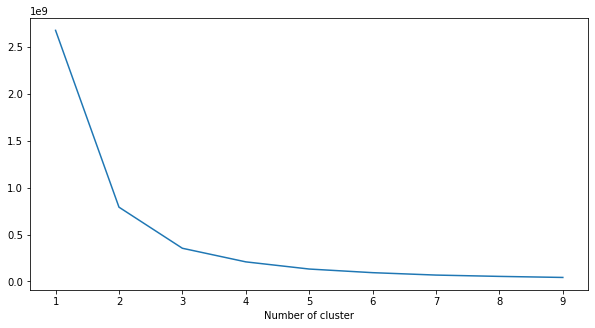

In [57]:
 from sklearn.cluster import KMeans

sse={}
df_recency = df_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_recency)
    df_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [58]:
#From the elbow chart between 4 and 5 appears to be the number of clusters
#we will build 5 clusters for recency and adding it to dataframe
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_user[['Recency']])
df_user['RecencyCluster'] = kmeans.predict(df_user[['Recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_user = order_cluster('RecencyCluster', 'Recency',df_user,False)

In [59]:
#displaying the details of each cluster
df_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,13611.0,513.444861,48.563124,449.0,474.0,507.0,543.0,694.0
1,18939.0,381.744126,35.602943,323.0,350.0,380.0,411.0,448.0
2,27716.0,262.189638,31.790169,208.0,232.0,267.0,284.0,322.0
3,30215.0,152.776634,31.176377,101.0,125.0,153.0,180.0,207.0
4,24537.0,48.262257,27.790502,0.0,24.0,44.0,73.0,100.0


In [60]:
#Frequency
#get order counts for each user and create a dataframe with it
df_frequency = consolidated_data.groupby('customer_unique_id').order_purchase_timestamp.count().reset_index()
df_frequency.columns = ['customer_unique_id','Frequency']

#add this data to our main dataframe
df_user = pd.merge(df_user, df_frequency, on='customer_unique_id')

In [61]:
df_user.Frequency.describe()

count    115018.000000
mean          1.777670
std           2.771438
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          75.000000
Name: Frequency, dtype: float64

In [62]:
#k-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_user[['Frequency']])
df_user['FrequencyCluster'] = kmeans.predict(df_user[['Frequency']])

#order the frequency cluster
df_user = order_cluster('FrequencyCluster', 'Frequency',df_user,True)

#see details of each cluster
df_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,100150.0,1.207968,0.405856,1.0,1.0,1.0,1.0,2.0
1,12932.0,4.041293,1.187930,3.0,3.0,4.0,5.0,7.0
2,1464.0,10.831967,2.252463,8.0,9.0,11.0,12.0,16.0
3,397.0,24.536524,6.099081,18.0,20.0,22.0,24.0,38.0
4,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


In [64]:
#Monetary

#calculate revenue for each customer
df_revenue = consolidated_data.groupby('customer_unique_id').payment_value.sum().reset_index()

#merge it with our main dataframe
df_user = pd.merge(df_user, df_revenue, on='customer_unique_id')

<ipython-input-65-54fdfb605184>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue["clusters"] = kmeans.labels_
<ipython-input-65-54fdfb605184>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue["clusters"] = kmeans.labels_
<ipython-input-65-54fdfb605184>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

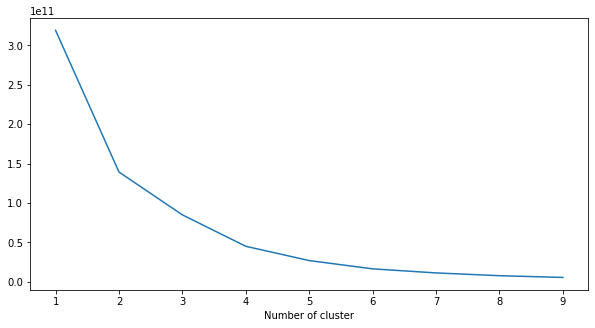

In [65]:
sse={}
df_revenue = df_user[['payment_value']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_revenue)
    df_revenue["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [66]:
#apply clustering
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_user[['payment_value']])
df_user['RevenueCluster'] = kmeans.predict(df_user[['payment_value']])


#order the cluster numbers
df_user = order_cluster('RevenueCluster', 'payment_value',df_user,True)

#show details of the dataframe
df_user.groupby('RevenueCluster')['payment_value'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,108541.0,193.114168,192.183340,9.59,67.5600,124.36,233.97,1043.51
1,5496.0,1891.703950,817.450277,1044.03,1262.1575,1620.00,2232.00,4415.96
2,743.0,7000.283419,2137.860492,4447.80,5289.1200,6317.22,7971.88,12490.88
3,184.0,20278.110435,5207.417793,14196.28,16313.6000,19174.38,25051.89,30186.00
4,46.0,43587.292174,2837.177072,36489.24,44048.0000,44048.00,45256.00,45256.00
5,8.0,109312.640000,0.000000,109312.64,109312.6400,109312.64,109312.64,109312.64


In [67]:
#renaming columns
df_user.columns = ['customer_unique_id', 'Recency', 'RecencyCluster', 'Frequency', 'FrequencyCluster', 'Monetary', 'RevenueCluster']
#calculate overall score and use mean() to see details
df_user['OverallScore'] = df_user['RecencyCluster'] + df_user['FrequencyCluster'] + df_user['RevenueCluster']
df_user.groupby('OverallScore')['Recency','Frequency','Monetary'].mean()

<ipython-input-67-841f299fabb1>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_user.groupby('OverallScore')['Recency','Frequency','Monetary'].mean()


,Recency,Frequency,Monetary
OverallScore,,,
0,512.439810,1.207119,168.293317
1,391.426920,1.363784,195.369341
2,274.879455,1.462521,221.696204
3,169.599726,1.569152,255.306337
4,70.236510,1.721580,309.441853
5,103.471344,5.988752,1191.586529
6,93.359971,6.768328,3125.889993
7,114.378685,11.943311,6014.895057
8,154.866667,12.030303,23948.324485


In [68]:
df_user['Segment'] = 'Low-Value'
df_user.loc[df_user['OverallScore']>3,'Segment'] = 'Mid-Value' 
df_user.loc[df_user['OverallScore']>6,'Segment'] = 'High-Value' 

In [69]:
df_user.head()

,customer_unique_id,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,RevenueCluster,OverallScore,Segment
0,861eff4711a542e4b93843c6dd7febb0,469,0,1,0,146.87,0,0,Low-Value
1,7f3a72e8f988c6e735ba118d54f47458,475,0,2,0,102.03,0,0,Low-Value
2,7f3a72e8f988c6e735ba118d54f47458,475,0,2,0,102.03,0,0,Low-Value
3,4390ddbb6276a66ff1736a6710205dca,502,0,1,0,94.63,0,0,Low-Value
4,2e6a42a9b5cbb0da62988694f18ee295,470,0,1,0,47.59,0,0,Low-Value
